# SIR Modelling

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
df_analyse=pd.read_csv(r"C:\Users\DELL\ads_covid-19\data\processed\COVID_small_flat_table.csv",sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,date,Italy,US,Spain,Germany,"Korea, South"
89,2020-04-20,181228,784326,200210,147065,10674
90,2020-04-21,183957,811865,204178,148291,10683
91,2020-04-22,187327,840351,208389,150648,10694
92,2020-04-23,189973,869170,213024,153129,10708
93,2020-04-24,192994,905358,219764,154999,10718


In [3]:
df_analyse.Italy[35]

453

In [4]:
N0=1000000 #max susceptible population 
beta=0.8  # recovery coefficient
gamma=0.1  # Transmission coefficient
# beta/gamma is known as reproduction rate, it is chosen as 4 meaning 1 person can infect 4 people
# condition I0+S0+R0=N0
I0=df_analyse.Italy[35]
S0=N0-I0
R0=0

In [5]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        dS+dI+dR=0
        S+I+R= N (constant p0opulation size)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

**Simulative approach to calculate SIR curves**

In [6]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [7]:
propagation_rates

,susceptible,infected,recoverd,recovered
0,999184.764167,769.935833,NaN,45.300000
1,998569.317644,1308.388772,NaN,122.293583
2,997524.104137,2222.763402,NaN,253.132461
3,995750.29608,3774.295119,NaN,475.408801
4,992743.691695,6403.469993,NaN,852.838313
5,987658.088143,10848.726545,NaN,1493.185312
6,979086.222128,18335.719906,NaN,2578.057966
7,964724.421542,30863.948501,NaN,4411.629957
8,940904.257651,51597.717542,NaN,7498.024807
9,902065.447954,85276.755485,NaN,12657.796561


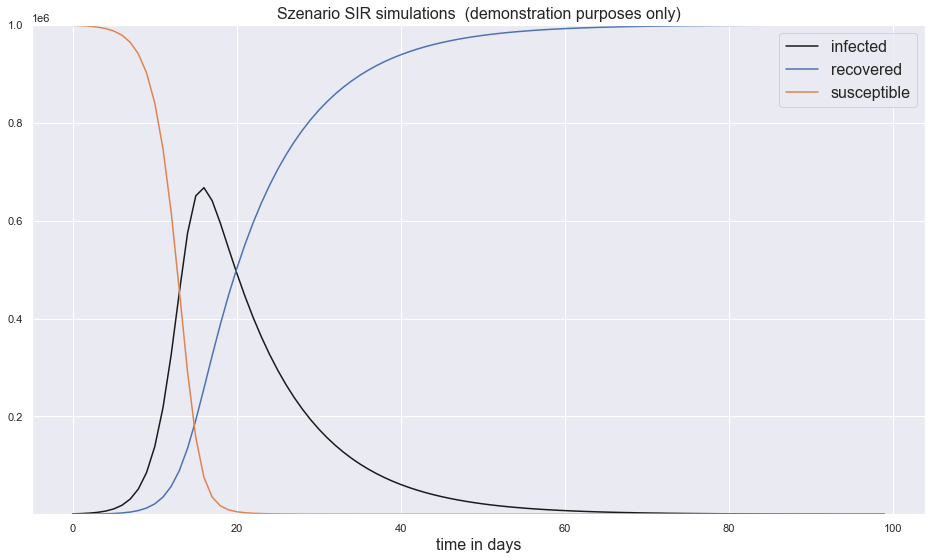

In [8]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**SIR Modelling parameter fitting**

In [9]:
ydata = np.array(df_analyse.Italy[35:])
t=np.arange(len(ydata))

In [10]:
# re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.8

In [11]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [12]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # only dI is expected

In [13]:
# curve for diff. equation
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([   453.        ,    611.35071563,    824.9732703 ,   1113.09346394,
         1501.56994909,   2025.13782462,   2730.37440529,   3679.58952004,
         4955.87364914,   6669.54915849,   8966.23457872,  12036.59920027,
        16127.57023684,  21554.12581436,  28709.68210444,  38071.2618098 ,
        50193.01406473,  65678.52756919,  85119.92222532, 108992.61872613,
       137503.28662944, 170408.73430143, 206854.08624188, 245305.6781855 ,
       283651.8463631 , 319492.68764143, 350551.70839155, 375072.49309016,
       392066.20596388, 401350.83347221, 403415.33907947, 399194.60598649,
       389839.73773809, 376535.52839418, 360381.51033175, 342329.99062384,
       323165.36276738, 303508.77966302, 283835.87567977, 264499.41888571,
       245752.19930786, 227767.80422071, 210658.36815695, 194489.17350683,
       179290.35838438, 165066.14057791, 151801.99017273, 139470.15235241,
       128033.85906043, 117450.51858421, 107674.11030942,  98656.96410427,
        90351.0684594 ,  

The curves needs to be fitted. Beta and gamma are the free paramaters.

In [14]:
# To get the fitted curve
fitted=fit_odeint(t, *popt)

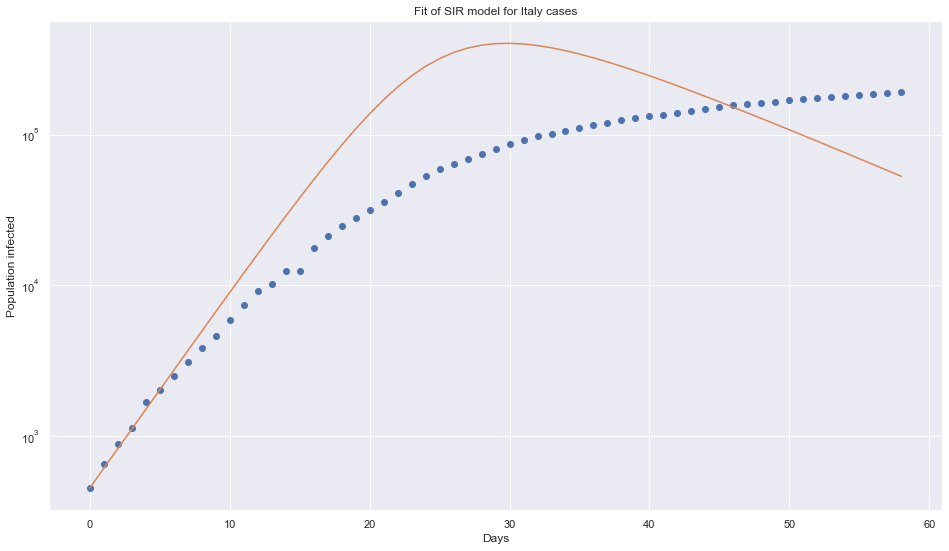

Optimal parameters: beta = 0.4  and gamma =  0.1
Basic Reproduction Number R0  4.0
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single in a population where all subjects are susceptible. @wiki


In [15]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Italy cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single in a population where all subjects are susceptible. @wiki")

**Dynamic beta in SIR (Infection Rate)**

In [16]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [17]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.37769231,
       0.35538462, 0.33307692, 0.31076923, 0.28846154, 0.26615385,
       0.24384615, 0.22153846, 0.19923077, 0.17692308, 0.15461538,
       0.13230769, 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.1245    ,
       0.139     , 0.1535    , 0.168     , 0.1825    , 0.197     ,
       0.2115    , 0.226     , 0.2405    , 0.255     , 0.2695 

In [18]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\2241058291.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [19]:
propagation_rates

,susceptible,infected,recoverd,recovered
0,999365.882084,588.817916,NaN,45.300000
1,999130.504269,765.313939,NaN,104.181792
2,998824.644868,994.641946,NaN,180.713186
3,998427.255713,1292.566907,NaN,280.177380
4,997911.042101,1679.523828,NaN,409.434071
5,997240.635951,2181.977595,NaN,577.386454
6,996370.253261,2834.162525,NaN,795.584213
7,995240.703168,3680.296366,NaN,1079.000466
8,993775.590871,4777.379027,NaN,1447.030102
9,991876.533805,6198.69819,NaN,1924.768005


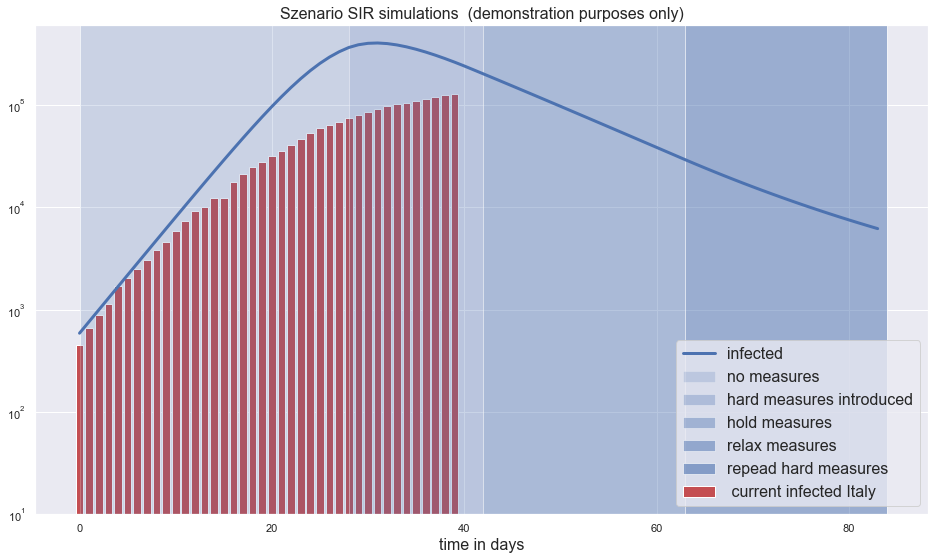

In [20]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata[0:40])),ydata[0:40],width = 0.8,label=' current infected Italy',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1], facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [21]:
t_phases

array([28, 42, 63, 84], dtype=int32)

# SIR fit curve - Dynamic Dashboard

* Dynamic dashoard for fit curve
* SIR curve of various countries


In [22]:
df_analyse=pd.read_csv(r"C:\Users\DELL\ads_covid-19\data\processed\COVID_small_flat_table.csv",sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,date,Italy,US,Spain,Germany,"Korea, South"
89,2020-04-20,181228,784326,200210,147065,10674
90,2020-04-21,183957,811865,204178,148291,10683
91,2020-04-22,187327,840351,208389,150648,10694
92,2020-04-23,189973,869170,213024,153129,10708
93,2020-04-24,192994,905358,219764,154999,10718


In [23]:
# Extracting data of desired countries
df_an = df_analyse[['date','Italy','US','Spain']]
df_an

,date,Italy,US,Spain
0,2020-01-22,0,1,0
1,2020-01-23,0,1,0
2,2020-01-24,0,2,0
3,2020-01-25,0,2,0
4,2020-01-26,0,5,0
5,2020-01-27,0,5,0
6,2020-01-28,0,5,0
7,2020-01-29,0,5,0
8,2020-01-30,0,5,0
9,2020-01-31,2,7,0


In [24]:
df_an = df_an.iloc[35:,]
df_an


,date,Italy,US,Spain
35,2020-02-26,453,57,13
36,2020-02-27,655,58,15
37,2020-02-28,888,60,32
38,2020-02-29,1128,68,45
39,2020-03-01,1694,74,84
40,2020-03-02,2036,98,120
41,2020-03-03,2502,118,165
42,2020-03-04,3089,149,222
43,2020-03-05,3858,217,259
44,2020-03-06,4636,262,400


In [25]:
N0=1000000 #max susceptible population 
beta=0.4  # recovery coefficient
gamma=0.1  # Transmission coefficient

# Generating a dataframe of infected, recovered and susceptible population of the selected countries
df = pd.DataFrame()
country_list = ['Italy','US','Spain']
for country in country_list:
    I0 = df_an._get_value(35,country)
    S0=N0-I0
    R0=0
    
    dict1 = {'country': country, 'susceptible':S0, 'infected':I0,'recoverd':R0}
                                           
    
    
    df = df.append(dict1, ignore_index=True)
print(df)

  country  susceptible  infected  recoverd
0   Italy       999547       453         0
1      US       999943        57         0
2   Spain       999987        13         0


C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\1338884655.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict1, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\1338884655.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict1, ignore_index=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\1338884655.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict1, ignore_index=True)


**Simulative approach to calculate SIR curve**

In [26]:
N0=1000000 #max susceptible population 
beta=0.4  # recovery coefficient
gamma=0.1  # Transmission coefficient
propagation_rates=pd.DataFrame(index = [country],columns={'susceptible':S0,
                                           'infected':I0,
                                           'recoverd':R0})

def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

country_list = ['Italy','US','Spain']
for country in country_list:
    I0 = df_an._get_value(35,country)
    S0=N0-I0
    R0=0
    
    SIR=np.array([S0,I0,R0])
    
    for each_t in np.arange(100):
        new_delta_vec=SIR_model(SIR,beta,gamma)
   
        SIR=SIR+new_delta_vec
    
        propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


        
print(propagation_rates.head())

C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed fro

C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed fro

     susceptible     infected recoverd country   recovered
0            NaN          NaN      NaN     NaN         NaN
1  999365.882084   588.817916      NaN   Italy   45.300000
2  999130.504269   765.313939      NaN   Italy  104.181792
3  998824.644868   994.641946      NaN   Italy  180.713186
4  998427.255713  1292.566907      NaN   Italy  280.177380


C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\3217479901.py:40: FutureWarning: The frame.append method is deprecated and will be removed fro

**SIR_curve-Italy**

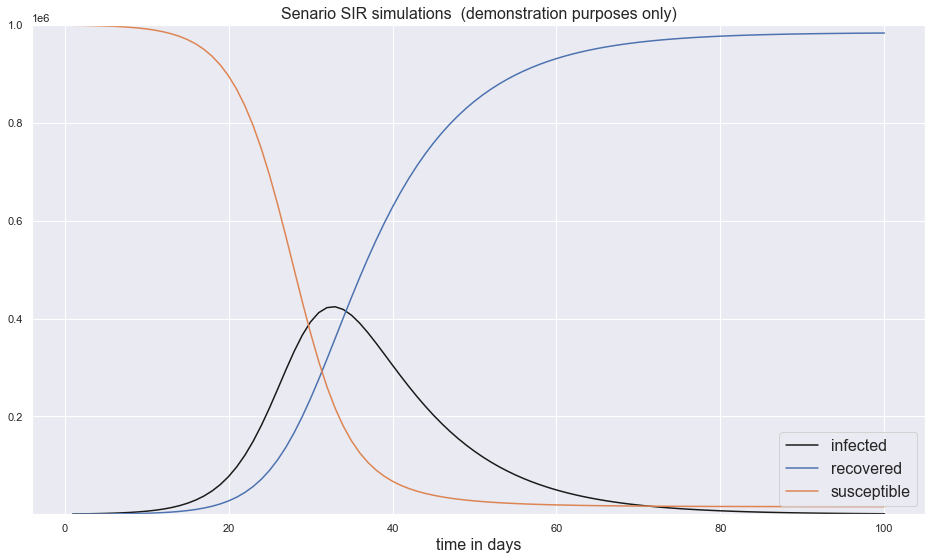

In [27]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[0:101],propagation_rates.infected[0:101],label='infected',color='k')
ax1.plot(propagation_rates.index[0:101],propagation_rates.recovered[0:101],label='recovered')
ax1.plot(propagation_rates.index[0:101],propagation_rates.susceptible[0:101],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**SIR_curve-US**

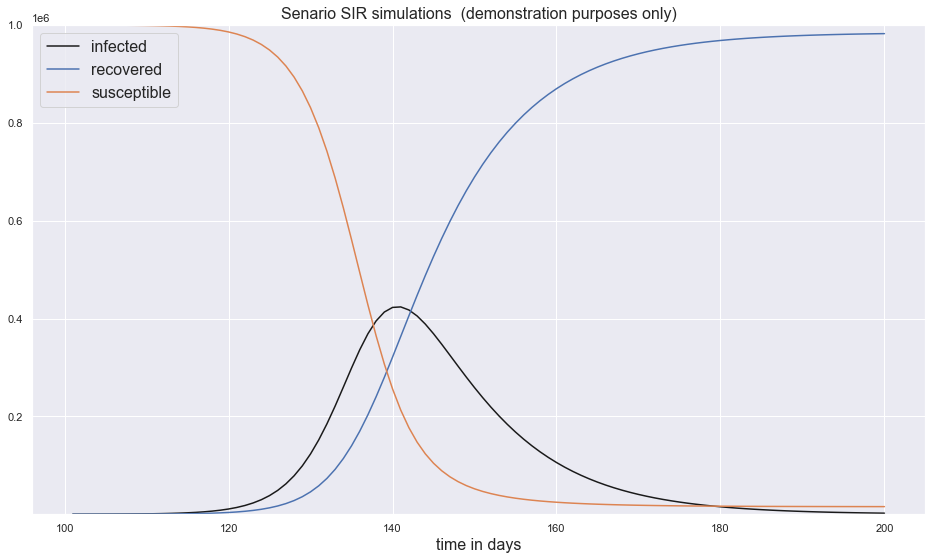

In [28]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[101:201],propagation_rates.infected[101:201],label='infected',color='k')
ax1.plot(propagation_rates.index[101:201],propagation_rates.recovered[101:201],label='recovered')
ax1.plot(propagation_rates.index[101:201],propagation_rates.susceptible[101:201],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**SIR_curve-Spain**

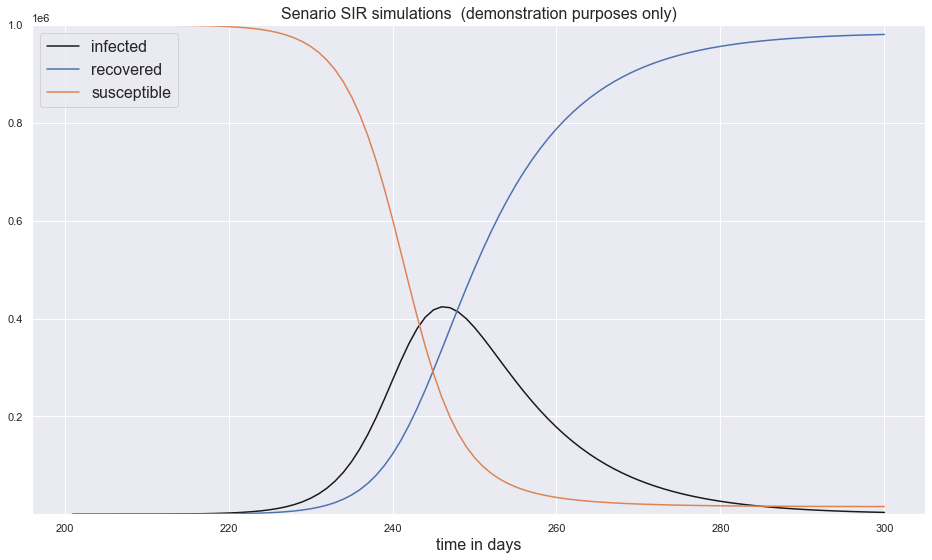

In [29]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[201:301],propagation_rates.infected[201:301],label='infected',color='k')
ax1.plot(propagation_rates.index[201:301],propagation_rates.recovered[201:301],label='recovered')
ax1.plot(propagation_rates.index[201:301],propagation_rates.susceptible[201:301],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**Fitting parameters for SIR Model**

In [30]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [31]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] 

In [32]:
country_list = ['Italy','US','Spain']
df1 = pd.DataFrame()
for country in country_list:
    ydata = np.array(df_analyse[country][35:])
    t = np.arange(len(ydata))
    # ensure re-initialization 
    I0=ydata[0]
    S0=N0-I0
    R0=0
    beta
    
    # example curve of our differential equationa
    popt=[0.4,0.1]
    fit_odeint(t, *popt)
    
    
    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
    perr = np.sqrt(np.diag(pcov))
    
    print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
    
    
    # get the final fitted curve
    fitted=fit_odeint(t, *popt)
    df1 = df1.append({'country': country,'t': t, 'ydata':ydata,'fitted':fitted},ignore_index=True)
print(df1.T)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\1295010750.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\1295010750.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\DELL\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\88689873.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'country': country,'t': t, 'ydata':ydata,'fitted':fitted},ignore_index=True)
C:\Users\DELL\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitati

standard deviation errors :  [0.00652977 0.00547099]  start infect: 453
Optimal parameters: beta = 0.29405579966220613  and gamma =  0.13330135179150945


C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\1295010750.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\1295010750.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\1295010750.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\DELL\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\88689873.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'country': country,'t': t, 'ydata':ydata,'fitted':fitted},ignore_index=True)
C:\Users\DELL\anaconda3\lib\site-packages\scip

standard deviation errors :  [1.82555581 1.47171856]  start infect: 57
Optimal parameters: beta = 0.9172408242378525  and gamma =  0.7379618708140884
standard deviation errors :  [0.00713855 0.00638524]  start infect: 13
Optimal parameters: beta = 0.4027316357802343  and gamma =  0.1663959685974305
                                                         0  \
country                                              Italy   
t        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
ydata    [453, 655, 888, 1128, 1694, 2036, 2502, 3089, ...   
fitted   [453.0, 531.9197858858945, 624.5598790728784, ...   

                                                         1  \
country                                                 US   
t        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
ydata    [57, 58, 60, 68, 74, 98, 118, 149, 217, 262, 4...   
fitted   [57.0, 68.1869000032302, 81.56466537010829, 97...   

                                                         2  
country          

C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\88689873.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'country': country,'t': t, 'ydata':ydata,'fitted':fitted},ignore_index=True)


In [33]:
df1 

,country,t,ydata,fitted
0,Italy,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[453, 655, 888, 1128, 1694, 2036, 2502, 3089, ...","[453.0, 531.9197858858945, 624.5598790728784, ..."
1,US,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[57, 58, 60, 68, 74, 98, 118, 149, 217, 262, 4...","[57.0, 68.1869000032302, 81.56466537010829, 97..."
2,Spain,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[13, 15, 32, 45, 84, 120, 165, 222, 259, 400, ...","[13.0, 16.465687160883224, 20.85524042835751, ..."


In [34]:
# Final dataframe
d_fin = pd.DataFrame({'timeline' : df1.t[0],'Italy_fitted': df1.fitted[0],  'Italy' : df1.ydata[0],
                  'US_fitted': df1.fitted[1],  'US' : df1.ydata[1],
                  'Spain_fitted': df1.fitted[2], 'Spain' : df1.ydata[2]})

d_fin

,timeline,Italy_fitted,Italy,US_fitted,US,Spain_fitted,Spain
0,0,453.000000,453,57.000000,57,13.000000,13
1,1,531.919786,655,68.186900,58,16.465687,15
2,2,624.559879,888,81.564665,60,20.855240,32
3,3,733.294688,1128,97.560338,68,26.414906,45
4,4,860.905375,1694,116.683326,74,33.456543,84
5,5,1010.648047,2036,139.540916,98,42.375096,120
6,6,1186.332658,2502,166.856544,118,53.670708,165
7,7,1392.414273,3089,199.491239,149,67.976712,222
8,8,1634.098234,3858,238.468701,217,86.095049,259
9,9,1917.460920,4636,285.004467,262,109.041071,400


**Curve for Italy**

* Original and fitted population

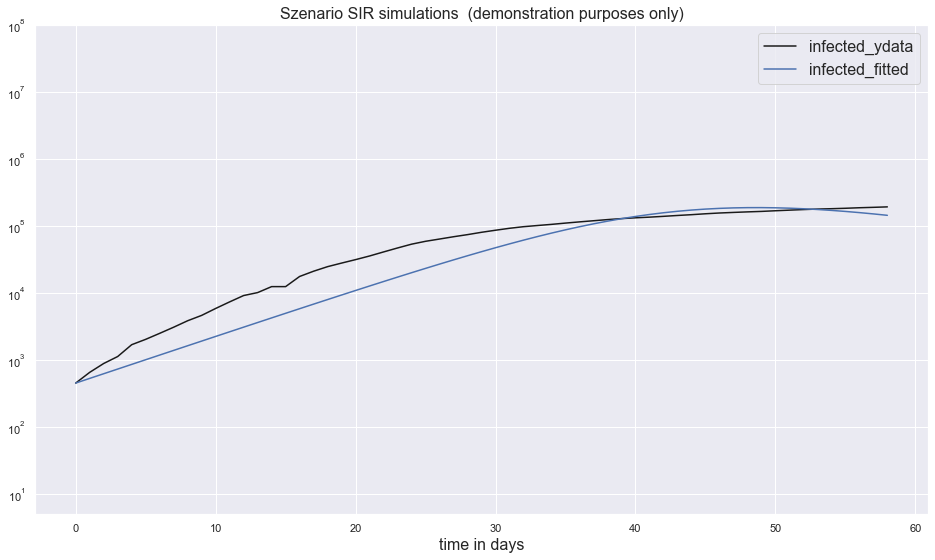

In [35]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[0],df1.ydata[0],label='infected_ydata',color='k')
ax1.plot(df1.t[0],df1.fitted[0],label='infected_fitted')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**Curve for Germany**

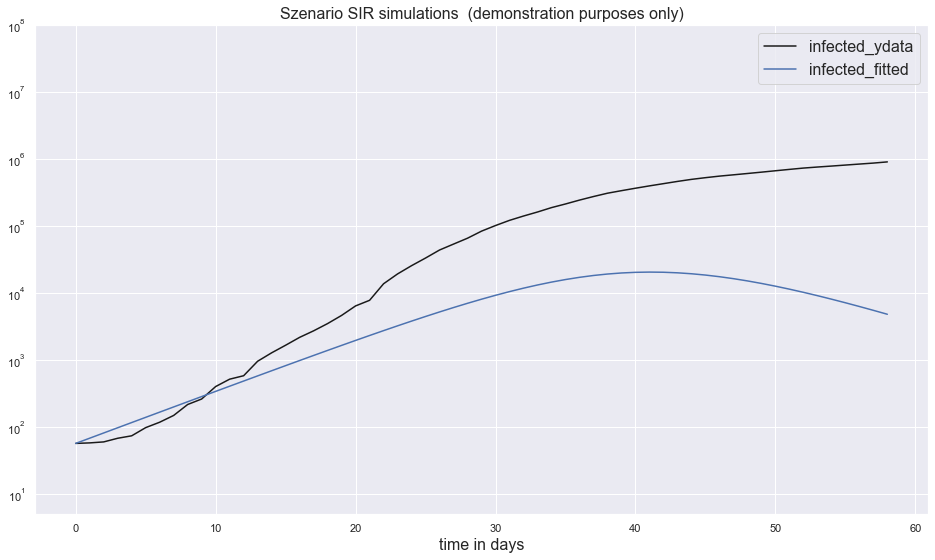

In [36]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[1],df1.ydata[1],label='infected_ydata',color='k')
ax1.plot(df1.t[1],df1.fitted[1],label='infected_fitted')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**Curve for Spain**

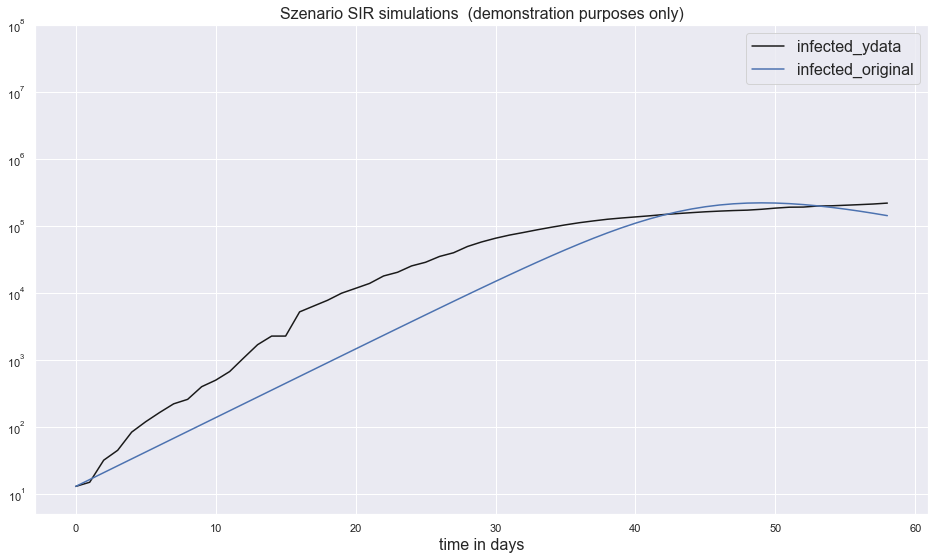

In [37]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[2],df1.ydata[2],label='infected_ydata',color='k')
ax1.plot(df1.t[2],df1.fitted[2],label='infected_original')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});


# Dynamic Dashboard

* Use of Dash Plotly

In [38]:
country_list = ['Italy','US','Spain']
country_list

['Italy', 'US', 'Spain']

In [39]:

import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

import os



fig = go.Figure()

app = dash.Dash()
app.layout = html.Div([
    dcc.Markdown('''
    #  Dynamic Dashboard
    (Using Dash Plotly)

    Goal of the exercise is to select and visualize the fit of different countries.

    '''),
    
   
    html.Br(),
    html.Br(),

    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': 'Italy','value':'Italy'},
                  {'label': 'US','value':'US'},
                  {'label': 'Spain','value':'Spain'}],
        value=['Italy'],# which are pre-selected
        placeholder = 'Multi-Select Country for Visualization',
        multi=True
    ),


    dcc.Graph(figure=fig, id='main_window_slope')
])

C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\1887104097.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\DELL\AppData\Local\Temp\ipykernel_4236\1887104097.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [40]:
@app.callback(Output('main_window_slope', 'figure'),[Input('country_drop_down', 'value')])

def update_figure(country_list):
    
    traces = []
    for each in country_list:
        traces.append(dict(x=d_fin.timeline,y=d_fin[str(each + '_fitted')],mode='markers+lines',opacity=0.9,name=str(each+"_fitted")))
            
        traces.append(dict(x=d_fin.timeline,y=d_fin[each],mode='markers+lines',opacity=0.9,name= str(each+"_ydata")))

    return {
            'data': traces,
            'layout': dict(width=1280,height=720, title = 'Infected along with fit curve',
                            xaxis={'title':'Timeline','tickangle':-45,'nticks':20,'tickfont':dict(size=14,color="#7f7f7f")},
                            yaxis= {'type':"log",'range':'[1.1,5.5]'})}

In [ ]:
if __name__ == '__main__':

    app.run_server(port = 4086,debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:4086/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
